In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('Dataset.csv')

In [3]:
car.head()

,name,company,year,price,kms_driven,fuel_type,Unnamed: 6,Unnamed: 7
0,COROLLA GLI,TOYOTA,2022.0,2714000.0,0,PETROL,NaN,
1,COROLLA ALTIS,TOYOTA,2022.0,3637000.0,0,PETROL,NaN,NaN
2,COROLLA ALTIS GRANDE,TOYOTA,2022.0,4330000.0,0,PETROL,NaN,NaN
3,YARIS 1.3 AT,TOYOTA,2022.0,3020000.0,0,PETROL,NaN,NaN
4,YARIS 1.3 MT,TOYOTA,2022.0,2847000.0,0,PETROL,NaN,NaN


In [4]:
car.shape

(599, 8)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        599 non-null    object 
 1   company     599 non-null    object 
 2   year        596 non-null    float64
 3   price       543 non-null    float64
 4   kms_driven  599 non-null    int64  
 5   fuel_type   599 non-null    object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  1 non-null      object 
dtypes: float64(3), int64(1), object(4)
memory usage: 37.6+ KB


In [6]:
backup=car.copy()

In [7]:
# QUALITY CHECKPOINTS
# names are pretty inconsistent
# names have company names attached to it
# some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
# company: many of the names are not of any company like 'Used', 'URJENT', and so on.
# year has many non-year values
# year is in object. Change to integer
# Price has Ask for Price
# Price has commas in its prices and is in object
# kms_driven has object values with kms at last.
# It has nan values and two rows have 'Petrol' in them
# fuel_type has nan values
# Cleaning Data
# year has many non-year values

In [8]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [9]:
car=car.drop("Unnamed: 6",axis=1)

In [10]:
car=car.drop("Unnamed: 7",axis=1)

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        599 non-null    object 
 1   company     599 non-null    object 
 2   year        596 non-null    float64
 3   price       543 non-null    float64
 4   kms_driven  599 non-null    int64  
 5   fuel_type   599 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


In [12]:
car=car[~car['price'].isna()]

In [13]:
car=car[~car['year'].isna()]

In [14]:
car['price']=car['price'].astype(int)

In [15]:
car['kms_driven']=car['kms_driven'].astype(int)

In [16]:
car['year']=car['year'].astype(int)

In [17]:
car=car.reset_index(drop=True)

In [18]:
car

,name,company,year,price,kms_driven,fuel_type
0,COROLLA GLI,TOYOTA,2022,2714000,0,PETROL
1,COROLLA ALTIS,TOYOTA,2022,3637000,0,PETROL
2,COROLLA ALTIS GRANDE,TOYOTA,2022,4330000,0,PETROL
3,YARIS 1.3 AT,TOYOTA,2022,3020000,0,PETROL
4,YARIS 1.3 MT,TOYOTA,2022,2847000,0,PETROL
...,...,...,...,...,...,...
538,CITY 1.3 AT,HONDA,2014,2050000,36000,PETROL
539,FORTUNER 2.7,TOYOTA,2021,10200000,15000,PETROL
540,TUCSON FWD GLS,HYUNDAI,2021,6090000,4500,PETROL
541,REVO G AT,TOYOTA,2021,7100000,12000,DIESEL


In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        543 non-null    object
 1   company     543 non-null    object
 2   year        543 non-null    int32 
 3   price       543 non-null    int32 
 4   kms_driven  543 non-null    int32 
 5   fuel_type   543 non-null    object
dtypes: int32(3), object(3)
memory usage: 19.2+ KB


In [20]:
car['price']=car['price'].astype(int)
car['kms_driven']=car['kms_driven'].astype(int)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        543 non-null    object
 1   company     543 non-null    object
 2   year        543 non-null    int32 
 3   price       543 non-null    int32 
 4   kms_driven  543 non-null    int32 
 5   fuel_type   543 non-null    object
dtypes: int32(3), object(3)
memory usage: 19.2+ KB


In [22]:
car.describe(include='all')

,name,company,year,price,kms_driven,fuel_type
count,543,543,543.000000,5.430000e+02,5.430000e+02,543
unique,43,5,NaN,NaN,NaN,2
top,FORTUNER 2.7,TOYOTA,NaN,NaN,NaN,PETROL
freq,18,172,NaN,NaN,NaN,485
mean,NaN,NaN,2018.906077,3.788432e+06,3.556851e+04,NaN
std,NaN,NaN,2.372276,2.123717e+06,7.482084e+04,NaN
min,NaN,NaN,2010.000000,6.900000e+04,0.000000e+00,NaN
25%,NaN,NaN,2018.000000,2.225000e+06,1.000000e+04,NaN
50%,NaN,NaN,2019.000000,3.000000e+06,2.200000e+04,NaN
75%,NaN,NaN,2021.000000,4.900000e+06,4.325000e+04,NaN


In [23]:
car['company'].unique()

array(['TOYOTA', 'HONDA', 'SUZUKI', 'HYUNDAI', 'KIA'], dtype=object)

In [25]:
import seaborn as sns

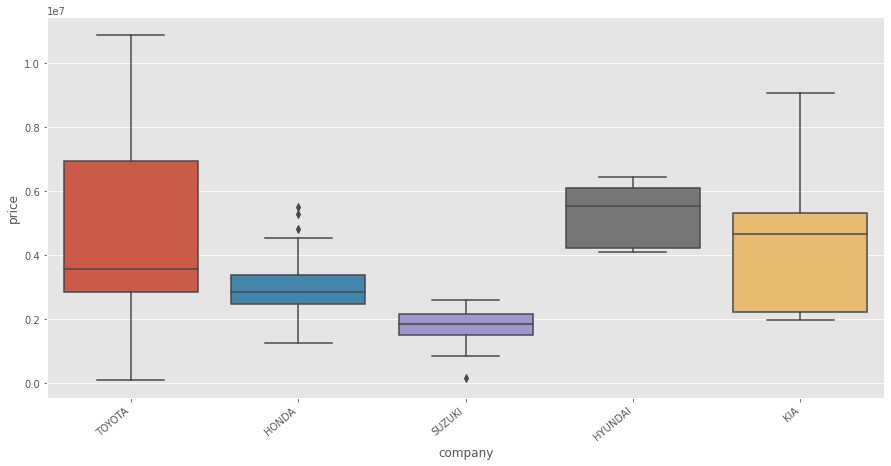

In [26]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

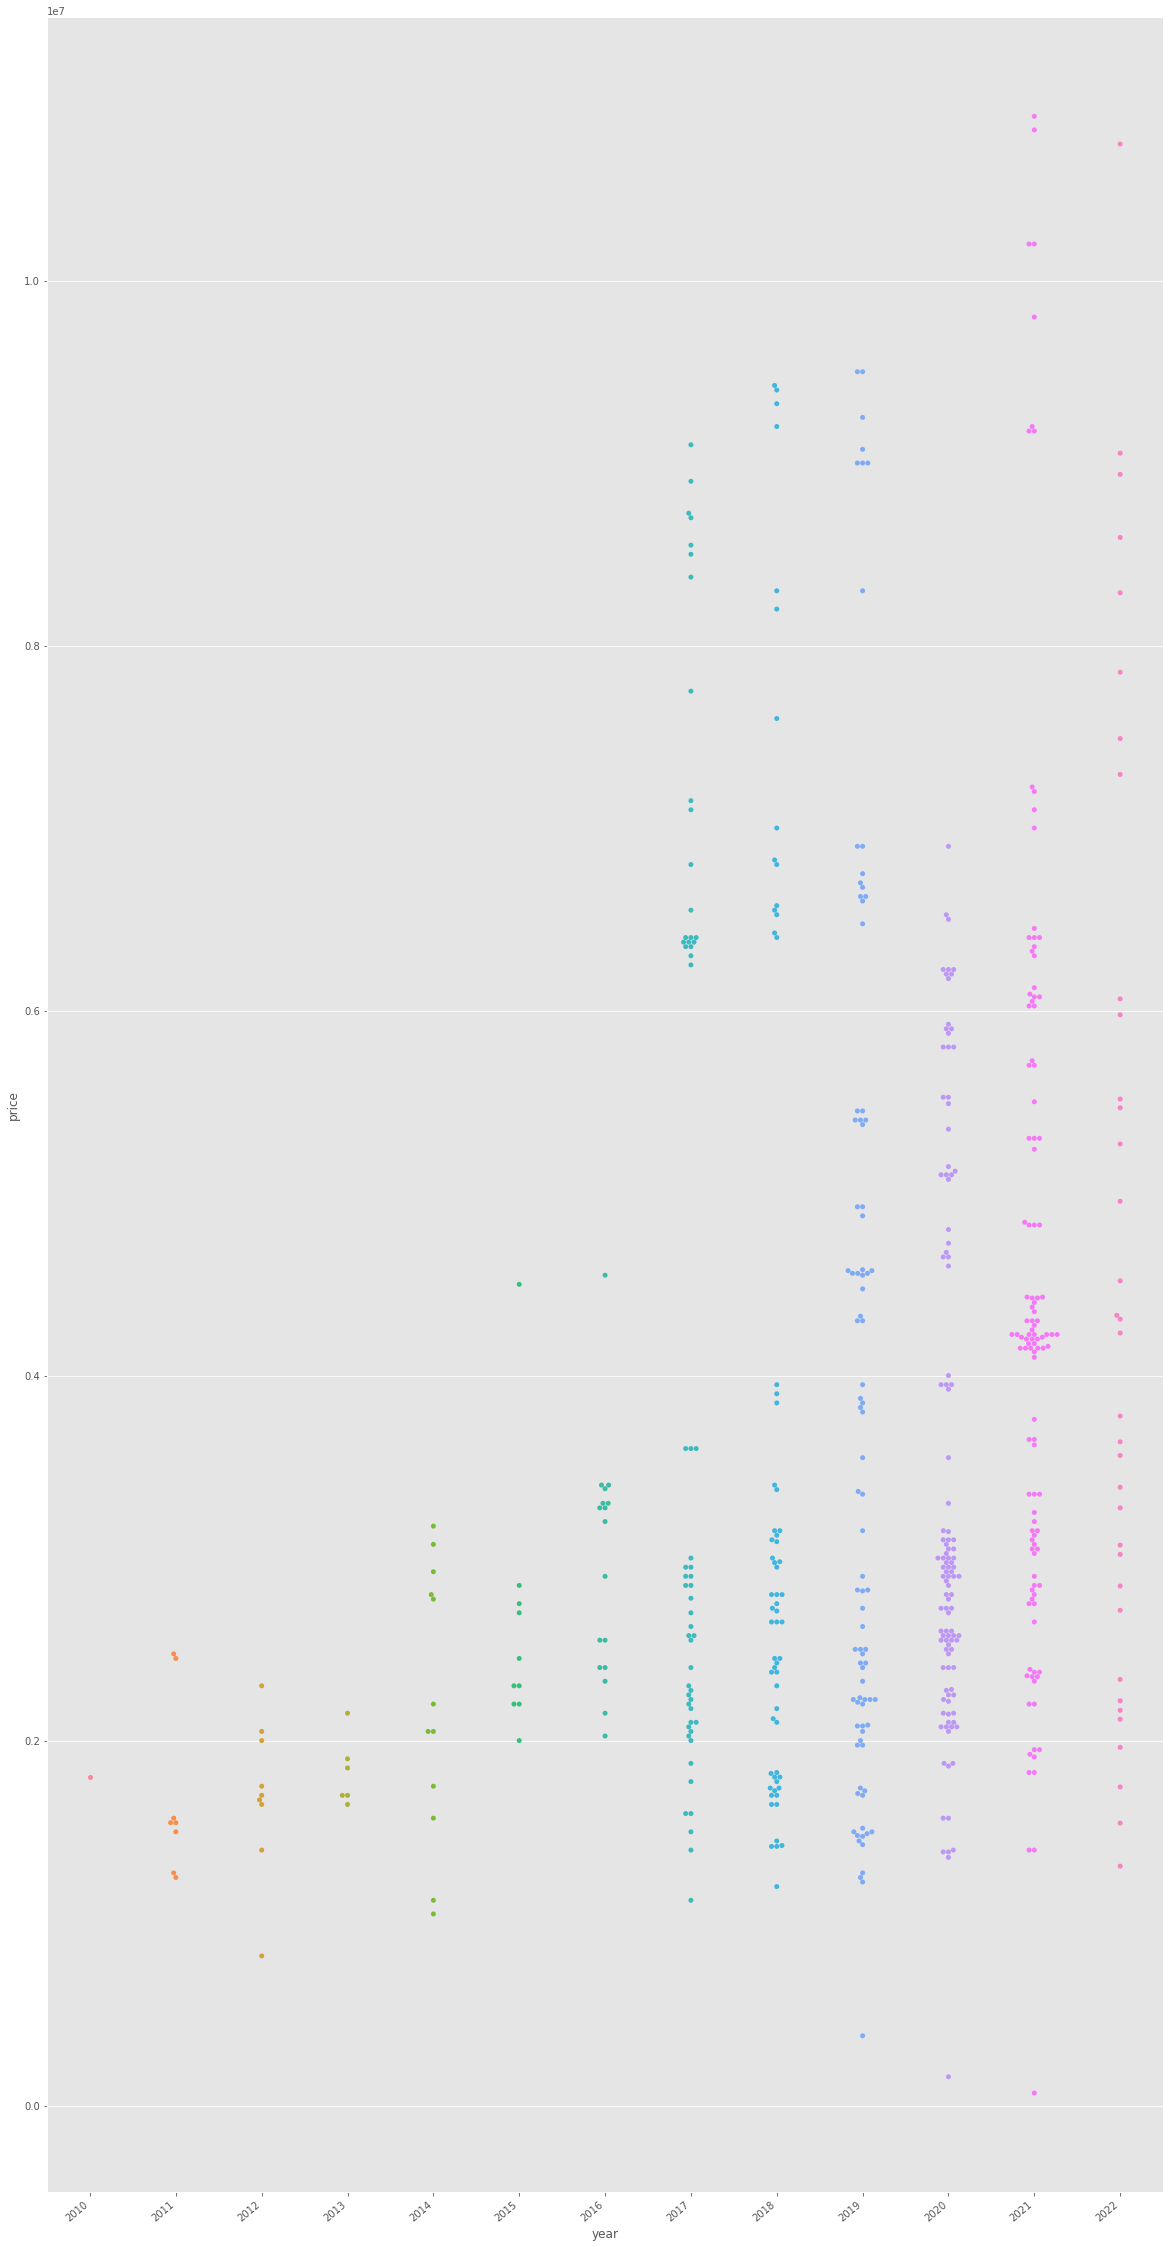

In [27]:
plt.subplots(figsize=(20,40))
ax=sns.swarmplot(x='year',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

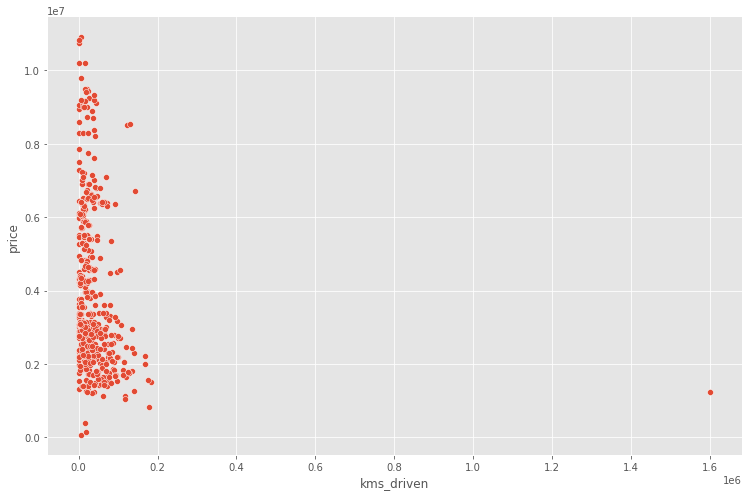

In [28]:
sns.relplot(x='kms_driven',y='price',data=car,height=7,aspect=1.5)

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

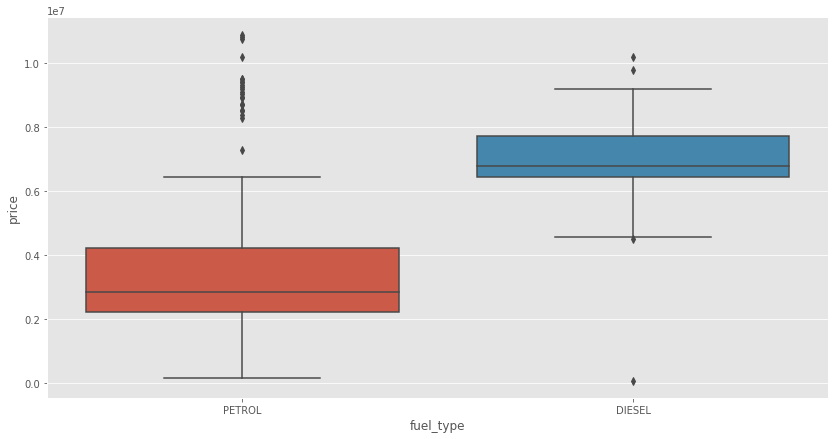

In [29]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='price',data=car)

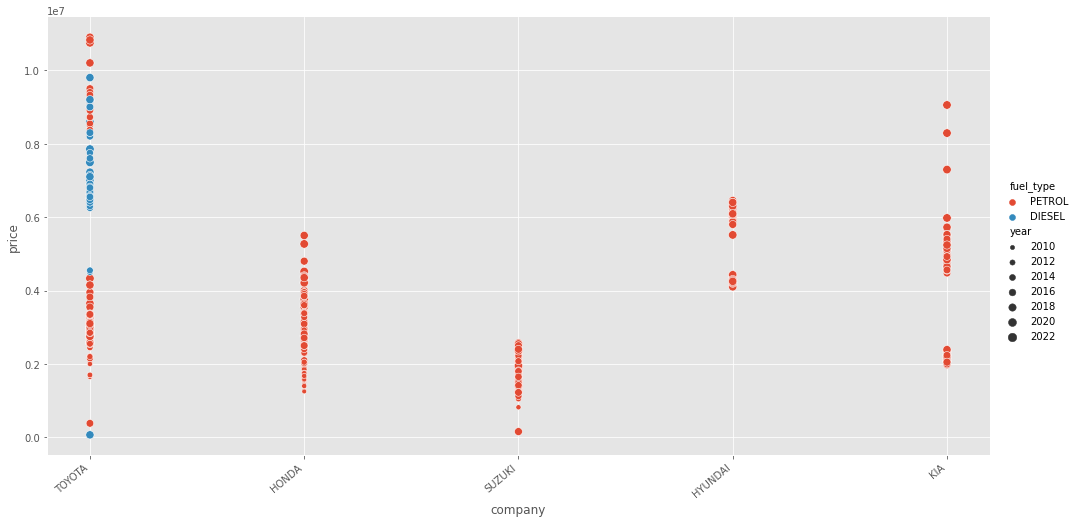

In [30]:
ax=sns.relplot(x='company',y='price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [31]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['price']

In [32]:
X

,name,company,year,kms_driven,fuel_type
0,COROLLA GLI,TOYOTA,2022,0,PETROL
1,COROLLA ALTIS,TOYOTA,2022,0,PETROL
2,COROLLA ALTIS GRANDE,TOYOTA,2022,0,PETROL
3,YARIS 1.3 AT,TOYOTA,2022,0,PETROL
4,YARIS 1.3 MT,TOYOTA,2022,0,PETROL
...,...,...,...,...,...
538,CITY 1.3 AT,HONDA,2014,36000,PETROL
539,FORTUNER 2.7,TOYOTA,2021,15000,PETROL
540,TUCSON FWD GLS,HYUNDAI,2021,4500,PETROL
541,REVO G AT,TOYOTA,2021,12000,DIESEL


In [33]:
y.shape

(543,)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [36]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [37]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [38]:
lr=LinearRegression()

In [39]:
pipe=make_pipeline(column_trans,lr)

In [40]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALTO VX', 'ALTO VXR', 'ALTO VXR AGS', 'BRV IVTEC CVT',
       'BRV IVTEC MT', 'BRV IVTEC S', 'CIAZ 1.4 AT', 'CIAZ 1.4 MT',
       'CITY 1.3 AT', 'CITY 1.3 MT', 'CITY 1.5 ASPIRE', 'CITY 1.5 MT',
       'CIVIC 1.5 TURBO', 'CIVIC 1.8 IVTEC', 'CIVIC 1.8 PROSMATEC',
       'CIVIC 1....
       'SORENTO 2.4 FWD', 'SORENTO 3.5 FWD', 'SPORTAGE ALPHA',
       'SPORTAGE AWD', 'SPORTAGE FWD', 'TUCSON AWD ULTIMATE',
       'TUCSON FWD GLS', 'YARIS 1.3 AT', 'YARIS 1.3 MT', 'YARIS 1.5 AT',
       'YARIS 1.5 MT'], dtype=object),
                                                                            array(['HONDA', 'HYUNDAI', 'KIA', 'SUZUKI', 'TOYOTA'], dtype=object),
                                                                            array(['DI

In [41]:
y_pred=pipe.predict(X_test)

In [42]:
r2_score(y_test,y_pred)

0.9589034765043174

In [43]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [44]:
np.argmax(scores)

35

In [45]:
scores[np.argmax(scores)]

0.9948988980198297

In [46]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['CULTUS VXR','SUZUKI',2016,90000,'PETROL']).reshape(1,5)))

array([1245764.1138618])

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9948988980198297

In [48]:
import pickle

In [49]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))